# Exploratory Data Analysis
###### by Wilson Lee
###### Data Set : China Mobile User Gemographics Source
###### Link : https://www.kaggle.com/chinapage/china-mobile-user-gemographics

#### Business perspective
The objective of this analysis is to determine the viability of using the provided data to find the interest of the given population. With knowledge of the population interest will it be possible to generate a list of topics to encorage user app engagement. It would be ideal to use the generated topics as the inspiration for aplication development.

In [1]:
# import libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# convert sientific notation to decimals
pd.set_option("display.float_format", lambda x:"%.2f" % x)

## Load Cleaned Database

### Phone Data

In [2]:
df_phone_data = pd.read_csv("../../Data/Processed/device_model_count.csv", index_col=None)

### Label categories

In [3]:
df_label_categories = pd.read_csv("../../Data/Processed/label_categories.csv", index_col=None)

### Event Data

In [4]:
wDatabaseFolder = "../../Data/Processed/users_with_age/active_apps"

list_of_database = []
for wRoot, wDirs, wFiles in os.walk(wDatabaseFolder):
    for wFilename in wFiles:
        wCurrentFilename = os.path.join(wRoot, wFilename)
        list_of_database.append(pd.read_csv(wCurrentFilename, index_col=None))
            
df_active_app = pd.concat(list_of_database, axis=0, ignore_index= True)

# de-reference loaded dataframe list
list_of_database = []

## Preview Data

### Phone Data

In [5]:
df_phone_data

,phone_brand,device_model,count
0,Cool ratio,H1,5
1,Cool ratio,H1S,2
2,Cool ratio,H2,107
3,Cool ratio,H6,2
4,Cool ratio,M1,19
5,Cool ratio,MUSE,2
6,Cool ratio,S1,14
7,Cool ratio,S2,196
8,Cool ratio,S3,95
9,Cool ratio,S6,26


### Label Categories

In [6]:
df_label_categories

,label_id,category,category-mod,3d,80,90,abroad,academic,accommodation,accounting,...,weibo,weight,west,western,wifi,word,world,xianxia,zombie,zuma
0,2,game-game type,game game type,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,game-Game themes,game game theme,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,game-Art Style,game art style,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,game-Leisure time,game leisure time,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,game-Cutting things,game cutting thing,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,7,game-Finding fault,game finding fault,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,8,game-stress reliever,game stress reliever,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,game-pet,game pet,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,10,game-Answer,game answer,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,11,game-Fishing,game fishing,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Event Data

In [7]:
df_active_app

,event_id,is_active,3d,80,90,abroad,academic,accommodation,accounting,action,...,device_id,gender,age,group_y,phone_brand,device_model,longitude,latitude,hour,day_of_week
0,6,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1476664663289716375,M,19,M22-,huawei,Mate 7,110.01,30.49,0,6
1,29,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,7166563712658305181,M,60,M39+,huawei,荣耀畅玩4C,117.96,28.47,0,6
2,35,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-3449419341168524142,M,28,M27-28,huawei,荣耀3X畅玩版,110.01,30.49,0,6
3,39,1,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,-6542093539413689868,M,26,M23-26,huawei,荣耀畅玩4X,110.01,30.49,0,6
4,40,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-5638521260975573107,M,22,M22-,huawei,荣耀7,110.01,30.49,0,6
5,44,1,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,-4713356591613805069,M,25,M23-26,xiaomi,红米2,113.37,28.25,0,6
6,54,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-7868922663453980926,F,27,F27-28,huawei,G660-L075,113.11,23.04,23,5
7,61,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-1593861387409811850,M,24,M23-26,xiaomi,红米Note3,110.40,25.31,0,6
8,70,1,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,8250516622760332376,M,28,M27-28,xiaomi,MI 3,121.68,31.12,0,6
9,82,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3230070203366080618,M,35,M32-38,huawei,Mate 7,110.01,30.49,0,6


## Normalize Event Data

### Check Individual User Events per Hour

In [8]:
df_events_per_user_per_hour = df_active_app[["device_id","day_of_week","hour"]].copy()
df_events_per_user_per_hour["count"] = 1
df_events_per_user_per_hour = df_events_per_user_per_hour.groupby(["device_id","day_of_week","hour"]).sum()
df_events_per_user_per_hour

count
device_id            day_of_week hour       
-9222956879900151005 4           15        6
                                 20        4
                                 21        3
                     5           7         1
                                 11        5
                                 12        4
                                 13        3
                                 14        3
                                 15        2
                                 23        2
-9221026417907250887 0           7         2
                                 8         2
                                 10        1
                                 20        2
                     1           7         2
                                 8         1
                                 9         1
                                 15        1
                                 22        1
                                 23        1
                     2           6         1
                                 7         2
                                 11        1
                                 13        1
                                 19        1
                                 22        1
                     3           6         4
                                 15        1
                                 18        1
                                 22        1
...                                      ...
 9220914901466458680 0           23        1
                     1           0         1
                                 5         1
                                 12        2
                                 23        1
                     2           6         1
                                 7         2
                                 13        1
                                 15        1
                                 18        2
                     3           6         4
                                 7         2
                                 12        1
                                 22        1
                                 23        1
                     4           6         1
                                 18        1
                                 20        1
                     5           0         1
                                 6         1
                                 19        1
                     6           5         1
                                 7         2
                                 8         1
                                 10        1
                                 11        2
                                 13        1
                                 16        1
                                 18        1
                                 19        1

[376606 rows x 1 columns]

### Reduce the Data to 1 Event Per User per Hour

In [9]:
df_normalized_active_app = df_active_app.drop('event_id', axis=1)
df_normalized_active_app = df_normalized_active_app.groupby(["device_id","gender","age","group_y","phone_brand","device_model","day_of_week","hour"]).max().reset_index()
df_normalized_active_app

,device_id,gender,age,group_y,phone_brand,device_model,day_of_week,hour,is_active,3d,...,west,western,wifi,word,world,xianxia,zombie,zuma,longitude,latitude
0,-9222956879900151005,M,36,M32-38,samsung,Galaxy Note 2,4,15,1,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,113.24,23.19
1,-9222956879900151005,M,36,M32-38,samsung,Galaxy Note 2,4,20,1,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,113.24,23.19
2,-9222956879900151005,M,36,M32-38,samsung,Galaxy Note 2,4,21,1,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,113.24,23.19
3,-9222956879900151005,M,36,M32-38,samsung,Galaxy Note 2,5,7,1,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,113.24,23.19
4,-9222956879900151005,M,36,M32-38,samsung,Galaxy Note 2,5,11,1,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,113.24,23.19
5,-9222956879900151005,M,36,M32-38,samsung,Galaxy Note 2,5,12,1,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,113.24,23.19
6,-9222956879900151005,M,36,M32-38,samsung,Galaxy Note 2,5,13,1,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,113.24,23.19
7,-9222956879900151005,M,36,M32-38,samsung,Galaxy Note 2,5,14,1,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,113.24,23.19
8,-9222956879900151005,M,36,M32-38,samsung,Galaxy Note 2,5,15,1,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,113.24,23.19
9,-9222956879900151005,M,36,M32-38,samsung,Galaxy Note 2,5,23,1,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,113.24,23.19


### Get Individual User Interest Profile

In [10]:
df_user_profile = df_normalized_active_app.drop(["day_of_week","hour"], axis=1)
df_user_profile = df_user_profile.groupby(["device_id","gender","age","group_y","phone_brand","device_model"]).mean().reset_index()
df_user_profile

,device_id,gender,age,group_y,phone_brand,device_model,is_active,3d,80,90,...,west,western,wifi,word,world,xianxia,zombie,zuma,longitude,latitude
0,-9222956879900151005,M,36,M32-38,samsung,Galaxy Note 2,1,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,113.24,23.19
1,-9221026417907250887,F,31,F29-32,vivo,X5V,1,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,114.36,30.87
2,-9220830859283101130,M,19,M22-,huawei,G628,1,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,110.01,30.49
3,-9220061629197656378,M,40,M39+,huawei,Mate 8,1,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,124.89,46.62
4,-9218960997324667698,F,53,F43+,xiaomi,红米note,1,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,110.01,30.49
5,-9218769147970107256,M,23,M23-26,huawei,荣耀畅玩5X,1,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,112.33,28.59
6,-9217193238265898015,M,33,M32-38,vivo,Y923,1,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,110.01,30.49
7,-9216200545381120263,F,45,F43+,samsung,Galaxy Premier,1,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,110.01,30.49
8,-9215964883962797708,M,28,M27-28,OPPO,R827T,1,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,110.01,30.49
9,-9215766592714662253,F,34,F33-42,coolpad,大神F1,1,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,110.01,30.49


## Seperate Event by Gender

In [11]:
df_male_users_active_app = df_normalized_active_app[df_normalized_active_app['gender']=="M"]
df_female_users_active_app = df_normalized_active_app[df_normalized_active_app['gender']=="F"]

df_male_users_profile = df_user_profile[df_user_profile['gender']=="M"]
df_female_users_profile = df_user_profile[df_user_profile['gender']=="F"]

## Check Data distribution in time

### WeekDay

In [12]:
df_weekDayCount = df_male_users_active_app['day_of_week'].value_counts().reset_index();
df_weekDayCount.columns = ["day_of_week", "male_count"]
df_weekDayCount["male_average"] = df_weekDayCount["male_count"].apply(lambda x: x/df_male_users_active_app["device_id"].nunique())

df_weekDayCount_2 = df_female_users_active_app['day_of_week'].value_counts().reset_index();
df_weekDayCount_2.columns = ["day_of_week", "female_count"]
df_weekDayCount_2["female_average"] = df_weekDayCount_2["female_count"].apply(lambda x: x/df_female_users_active_app["device_id"].nunique())

df_weekDayCount = df_weekDayCount.merge(df_weekDayCount_2, on="day_of_week", how="left")
df_weekDayCount = df_weekDayCount.sort_values("day_of_week")
df_weekDayCount

,day_of_week,male_count,male_average,female_count,female_average
5,0,35962,2.37,16075,2.01
2,1,37890,2.50,16598,2.08
3,2,37837,2.50,16605,2.08
0,3,38413,2.54,17289,2.16
1,4,38100,2.52,17668,2.21
4,5,36004,2.38,16629,2.08
6,6,35788,2.36,15762,1.97


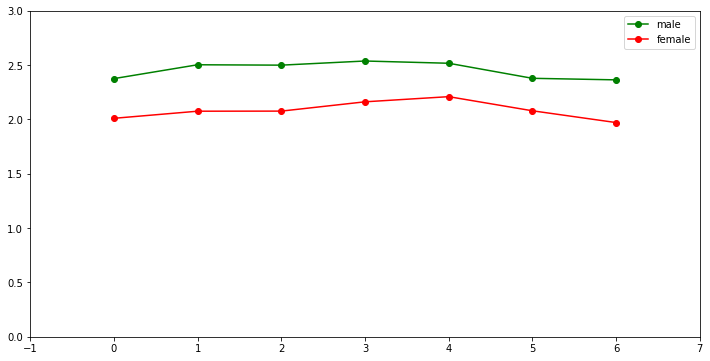

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df_weekDayCount['day_of_week'], df_weekDayCount["male_average"], "o-", color="green", label='male')
plt.plot(df_weekDayCount['day_of_week'], df_weekDayCount["female_average"], "o-", color="red", label='female')
plt.legend(loc='upper right')
plt.xlim([-1,7])
plt.ylim([0,3])
plt.show()

### Hour of Day

In [14]:
df_HourOfDayCount = df_male_users_active_app['hour'].value_counts().reset_index();
df_HourOfDayCount.columns = ["hour", "male_count"]
df_HourOfDayCount["male_average"] = df_HourOfDayCount["male_count"].apply(lambda x: x/df_male_users_active_app["device_id"].nunique())

df_HourOfDayCount_2 = df_female_users_active_app['hour'].value_counts().reset_index();
df_HourOfDayCount_2.columns = ["hour", "female_count"]
df_HourOfDayCount_2["female_average"] = df_HourOfDayCount_2["female_count"].apply(lambda x: x/df_female_users_active_app["device_id"].nunique())

df_HourOfDayCount = df_HourOfDayCount.merge(df_HourOfDayCount_2, on="hour", how="left")
df_HourOfDayCount = df_HourOfDayCount.sort_values("hour")
df_HourOfDayCount

,hour,male_count,male_average,female_count,female_average
17,0,9555,0.63,3411,0.43
19,1,6097,0.40,2087,0.26
21,2,4503,0.30,1634,0.20
22,3,3979,0.26,1530,0.19
23,4,3710,0.24,1505,0.19
20,5,5300,0.35,2376,0.30
18,6,9114,0.60,4342,0.54
15,7,11685,0.77,5528,0.69
9,8,12781,0.84,5885,0.74
5,9,13204,0.87,6170,0.77


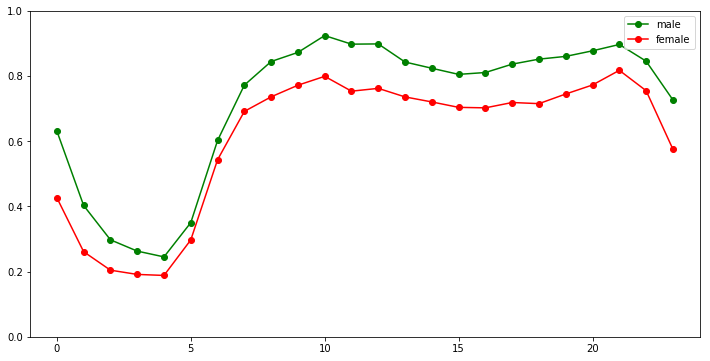

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df_HourOfDayCount['hour'], df_HourOfDayCount["male_average"], "-o", color="green", label='male')
plt.plot(df_HourOfDayCount['hour'], df_HourOfDayCount["female_average"], "-o", color="red", label='female')
plt.legend(loc='upper right')
plt.xlim([-1,24])
plt.ylim([0,1])
plt.show()


### Hour of Week

In [16]:
df_hour_dist_male = df_male_users_active_app[["day_of_week", "hour"]].copy()
df_hour_dist_male['Dist_24_7'] = df_hour_dist_male.apply(lambda x: x['day_of_week']*24 + x["hour"], axis=1)

df_hour_dist_female = df_female_users_active_app[["day_of_week", "hour"]].copy()
df_hour_dist_female['Dist_24_7'] = df_hour_dist_female.apply(lambda x: x['day_of_week']*24 + x["hour"], axis=1)


In [17]:
df_24_7 = df_hour_dist_male['Dist_24_7'].value_counts().reset_index();
df_24_7.columns = ["Dist_24_7", "male_24_7_count"]
df_24_7["male_average"] = df_24_7["male_24_7_count"].apply(lambda x: x/df_male_users_active_app["device_id"].nunique())

df_24_7_2 = df_hour_dist_female['Dist_24_7'].value_counts().reset_index();
df_24_7_2.columns = ["Dist_24_7", "female_24_7_count"]
df_24_7_2["female_average"] = df_24_7_2["female_24_7_count"].apply(lambda x: x/df_female_users_active_app["device_id"].nunique())

df_24_7 = df_24_7.merge(df_24_7_2, on="Dist_24_7", how="left")
df_24_7 = df_24_7.sort_values("Dist_24_7")
df_24_7

,Dist_24_7,male_24_7_count,male_average,female_24_7_count,female_average
124,0,1378,0.09,505,0.06
134,1,893,0.06,307,0.04
149,2,660,0.04,243,0.03
154,3,593,0.04,210,0.03
165,4,535,0.04,205,0.03
146,5,708,0.05,287,0.04
132,6,1143,0.08,541,0.07
115,7,1562,0.10,725,0.09
79,8,1778,0.12,794,0.10
49,9,1872,0.12,867,0.11


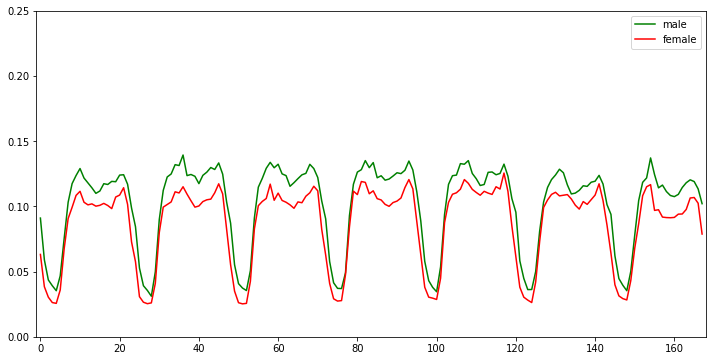

In [18]:
plt.figure(figsize=(12,6))
plt.plot(df_24_7['Dist_24_7'], df_24_7["male_average"], "-", color="green", label='male')
plt.plot(df_24_7['Dist_24_7'], df_24_7["female_average"], "-", color="red", label='female')
plt.legend(loc='upper right')
plt.xlim([-1,168])
plt.ylim([0,0.25])
plt.show()

### Week day vs Hour plot

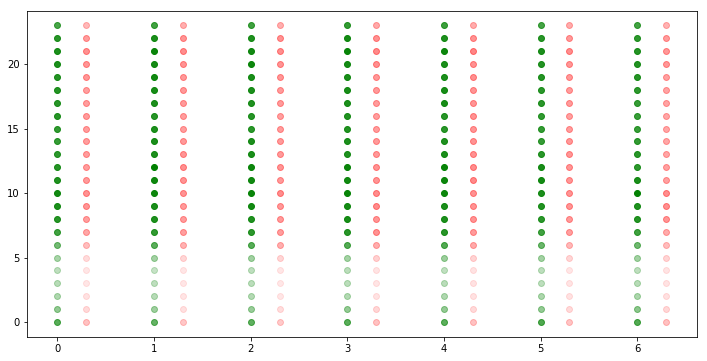

In [19]:
df_hour_dist_male_count = df_hour_dist_male.groupby(by=["day_of_week", "hour"]).count()
df_hour_dist_male_count.columns = ["count"]
df_hour_dist_male_count = df_hour_dist_male_count.reset_index();
max_user_at_hour  = df_hour_dist_male_count ["count"].max()

df_hour_dist_female_count = df_hour_dist_female.groupby(by=["day_of_week", "hour"]).count()
df_hour_dist_female_count.columns = ["count"]
df_hour_dist_female_count = df_hour_dist_female_count.reset_index();
max_user_at_hour2  = df_hour_dist_male_count ["count"].max()
if max_user_at_hour < max_user_at_hour2:
    max_user_at_hour = max_user_at_hour2

plt.figure(figsize=(12,6))
for index, row in df_hour_dist_male_count.iterrows():
    plt.plot(row['day_of_week'], row['hour'], 'o', color='green', alpha=row["count"]/max_user_at_hour)
for index, row in df_hour_dist_female_count.iterrows():
    plt.plot(row['day_of_week'] + 0.3, row['hour'], 'o', color='red', alpha=row["count"]/max_user_at_hour)
plt.show()


## User Age Distribution

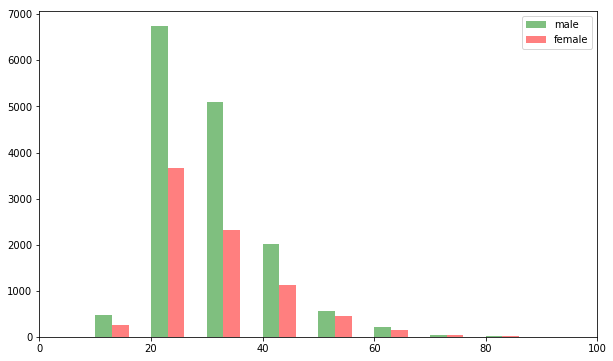

In [20]:
plt.figure(figsize=(10,6))

plt.xlim([0,100])

plt.hist(df_male_users_profile['age'], bins=[0,10,20,30,40,50,60,70,80,90], width=3, color="green", alpha=0.5, label='male')
plt.hist(df_female_users_profile['age'] + 3, bins=[3,13,23,33,43,53,63,73,83,93], width=3, color="red", alpha=0.5, label='female')
plt.legend(loc='upper right')
plt.show()


## Device Brand Distribution

### Number of Users per Phone Brand

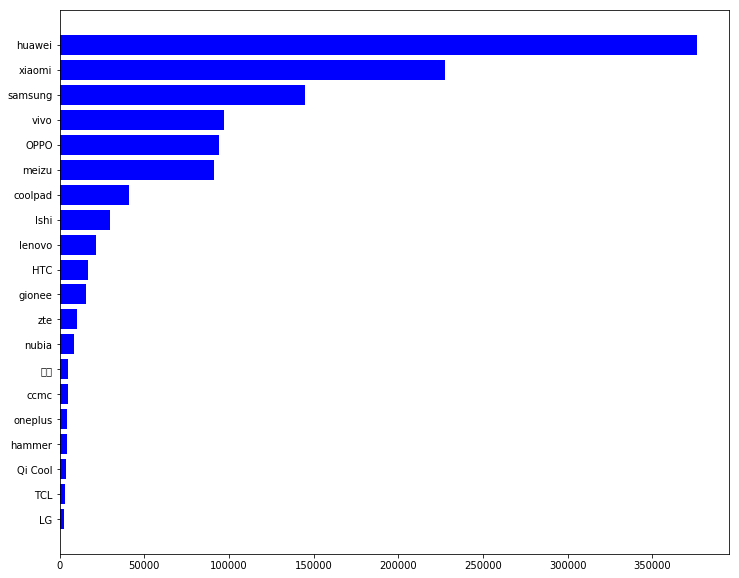

In [21]:
df_brand_count = df_phone_data.groupby(['phone_brand'])["count"].sum().reset_index()
df_brand_count = df_brand_count.sort_values(by=['count'])
df_brand_count = df_brand_count.tail(20)
plt.figure(figsize=(12,10))
plt.barh(df_brand_count['phone_brand'],df_brand_count['count'], color='blue', orientation='horizontal')
plt.show()

#### Male Users Phone Device Brand

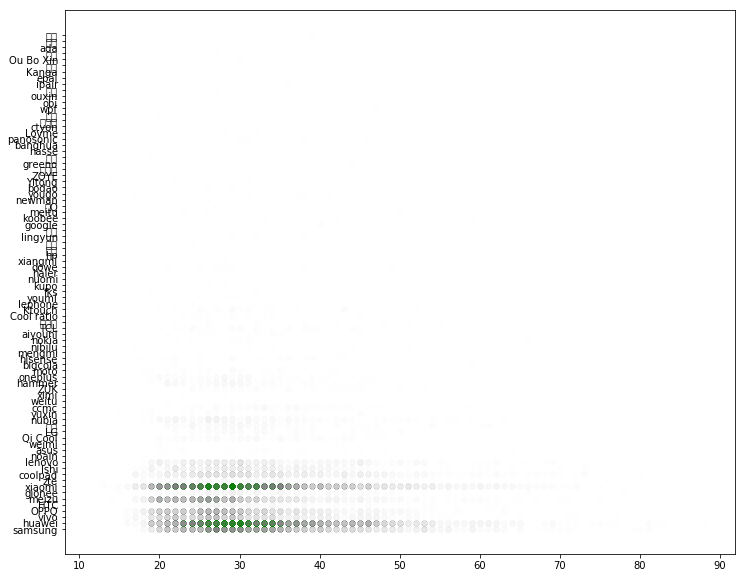

In [22]:
plt.figure(figsize=(12,10))
plt.plot(df_male_users_profile['age'], df_male_users_profile['phone_brand'], 'o', color='green', alpha=0.005, label='male')
plt.show()

#### Female Users Phone Device Brand

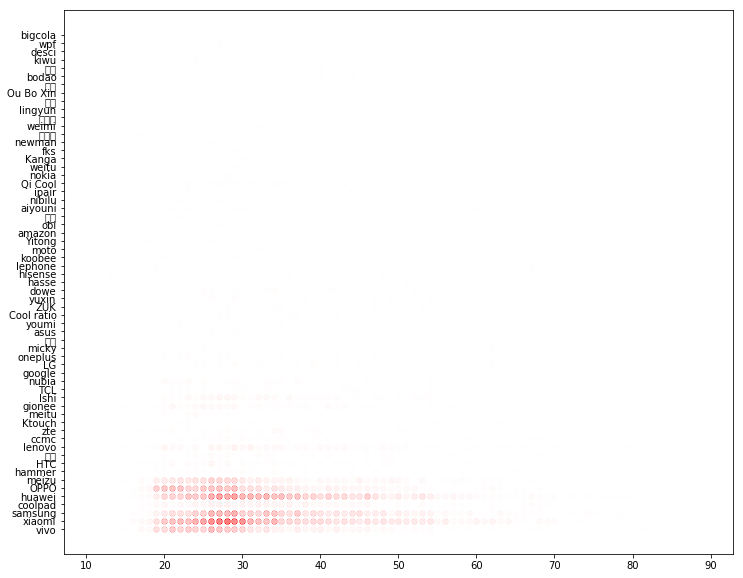

In [23]:
plt.figure(figsize=(12,10))
plt.plot(df_female_users_profile['age'], df_female_users_profile['phone_brand'], 'o', color='red', alpha=0.005, label='female')
plt.show()

## Event Interest Vector

### Extract Vector Columns

In [24]:
list_interest_vector = df_active_app.columns
list_exclude_columns = [ "event_id","is_active","device_id","gender","age","group_y","phone_brand","device_model","longitude","latitude","hour","day_of_week"]

temp = []
for word in list_interest_vector:
    if word in list_exclude_columns:
        continue
    else:
        temp.append(word)
list_interest_vector = temp

list_interest_vector

['3d',
 '80',
 '90',
 'abroad',
 'academic',
 'accommodation',
 'accounting',
 'action',
 'activity',
 'adventure',
 'advice',
 'advisory',
 'aggregate',
 'air',
 'aircraft',
 'airport',
 'alliance',
 'amoy',
 'animation',
 'answer',
 'antique',
 'app',
 'appliance',
 'application',
 'area',
 'around',
 'art',
 'asia',
 'astrology',
 'audiobooks',
 'automotive',
 'aviation',
 'avoid',
 'baby',
 'ball',
 'bank',
 'banking',
 'based',
 'basketball',
 'beach',
 'beauty',
 'behalf',
 'big',
 'billards',
 'blog',
 'bobble',
 'bond',
 'book',
 'booking',
 'box',
 'brokerage',
 'browser',
 'bus',
 'business',
 'buy',
 'calendar',
 'car',
 'card',
 'care',
 'cartoon',
 'casual',
 'chain',
 'channel',
 'checkpoint',
 'chess',
 'child',
 'chinese',
 'church',
 'class',
 'classical',
 'clock',
 'coach',
 'collection',
 'college',
 'comfortable',
 'comic',
 'commodity',
 'community',
 'comparing',
 'competitive',
 'complex',
 'condition',
 'consumer',
 'contact',
 'content',
 'convenience',
 'cool

### Extract interest vector and time

#### Male Users

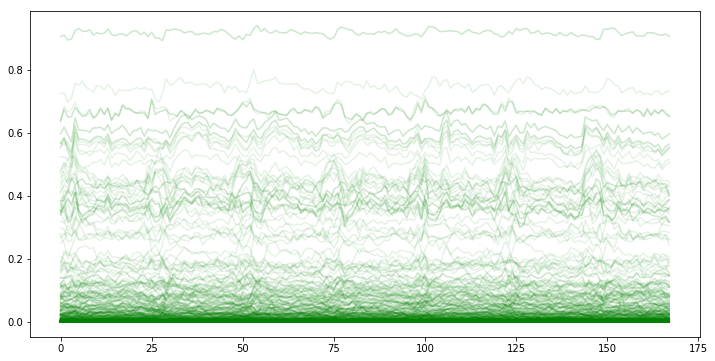

In [25]:
df_male_interest_vs_time = df_male_users_active_app.groupby(["day_of_week","hour"])[list_interest_vector].mean()
df_male_interest_vs_time = df_male_interest_vs_time.reset_index()

plt.figure(figsize=(12,6))
for word in list_interest_vector:
    plt.plot(df_male_interest_vs_time.index, df_male_interest_vs_time[word], '-', color='green', alpha=0.1)
plt.show()

#### Female Users

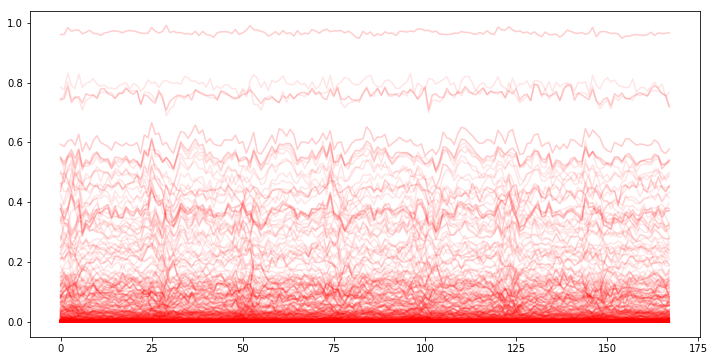

In [26]:
df_female_interest_vs_time = df_female_users_active_app.groupby(["day_of_week","hour"])[list_interest_vector].mean()
df_female_interest_vs_time = df_female_interest_vs_time.reset_index()

plt.figure(figsize=(12,6))
for word in list_interest_vector:
    plt.plot(df_female_interest_vs_time.index, df_female_interest_vs_time[word], '-', color='red', alpha=0.1)
plt.show()

#### Finding the Most Interested Labels

##### Male interest

###### Male interest count

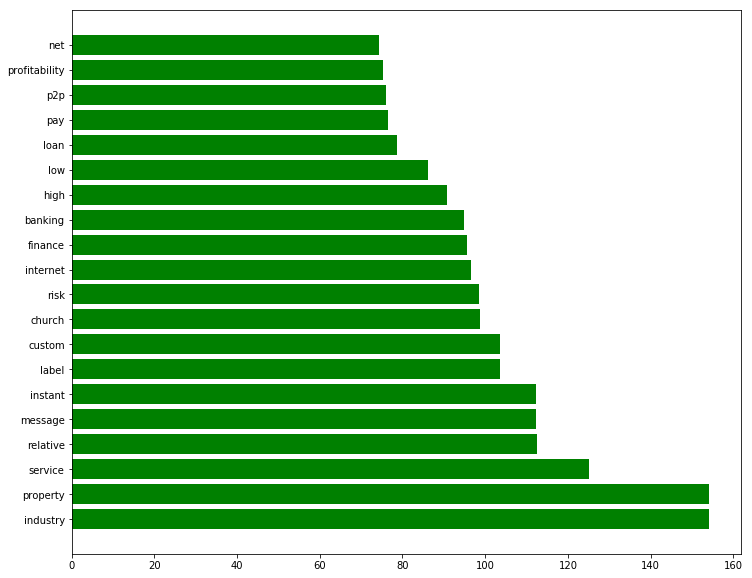

In [27]:
df_agg_male_interest = df_male_interest_vs_time.drop(["day_of_week","hour"], axis=1).sum().to_frame()
df_agg_male_interest.columns = ['count']
df_agg_male_interest = df_agg_male_interest.sort_values(by=['count'],ascending=False)
df_agg_male_interest_top_20 = df_agg_male_interest.head(20)

plt.figure(figsize=(12,10))
plt.barh(df_agg_male_interest_top_20.index,df_agg_male_interest_top_20['count'], color='green')
plt.show()


###### Male interest histogram

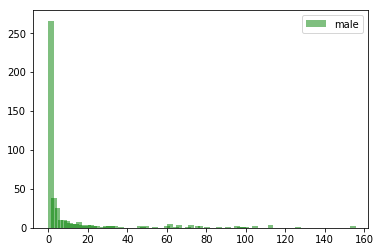

In [28]:
plt.hist(df_agg_male_interest['count'], bins=100, width=3, color="green", alpha=0.5, label='male')
plt.legend(loc='upper right')
plt.show()

###### Male interest distribution

In [29]:
wMale_Interest_Average = df_agg_male_interest['count'].mean()
wMale_Interest_Standard_Deviation = df_agg_male_interest['count'].std()
wMale_Interest_Upper = wMale_Interest_Average + 3*wMale_Interest_Standard_Deviation
wMale_Interest_Lower = wMale_Interest_Average - 3*wMale_Interest_Standard_Deviation

print("Interest Vector Sum Average : {0}".format(wMale_Interest_Average))
print("Interest Vector Sum Standar Deviation: {0}".format(wMale_Interest_Standard_Deviation))
print("Interest Vector Sum Upper Limit : {0}".format(wMale_Interest_Upper))
print("Interest Vector Sum Lower Limit: {0}".format(wMale_Interest_Lower))

Interest Vector Sum Average : 10.523599800799545
Interest Vector Sum Standar Deviation: 24.361875187629035
Interest Vector Sum Upper Limit : 83.60922536368665
Interest Vector Sum Lower Limit: -62.56202576208756


###### Male interest within 3 time Standar Diviation

In [30]:
df_agg_male_interest_keep = df_agg_male_interest[(df_agg_male_interest['count'] > wMale_Interest_Lower) & (df_agg_male_interest['count'] < wMale_Interest_Upper)]
df_agg_male_interest_keep.sort_values('count')

,count
intelligent,0.00
estate,0.00
aircraft,0.00
word,0.00
airport,0.00
alliance,0.00
ball,0.00
taiwan,0.00
beach,0.00
browser,0.00


###### Male interest outside 3 time Standar Diviation

In [31]:
df_agg_male_interest_drop = df_agg_male_interest[(df_agg_male_interest['count'] < wMale_Interest_Lower) | (df_agg_male_interest['count'] > wMale_Interest_Upper)]
df_agg_male_interest_drop.sort_values('count')

,count
low,86.18
high,90.65
banking,94.99
finance,95.53
internet,96.60
risk,98.55
church,98.72
label,103.67
custom,103.67
message,112.31


###### Male Interest with 0 Count

In [32]:
df_agg_male_interest_drop = df_agg_male_interest[(df_agg_male_interest['count'] < 0.01) ]
df_agg_male_interest_drop.sort_values('count')

,count
intelligent,0.00
taiwan,0.00
estate,0.00
aircraft,0.00
word,0.00
airport,0.00
alliance,0.00
general,0.00
ball,0.00
furniture,0.00


##### Female Interest

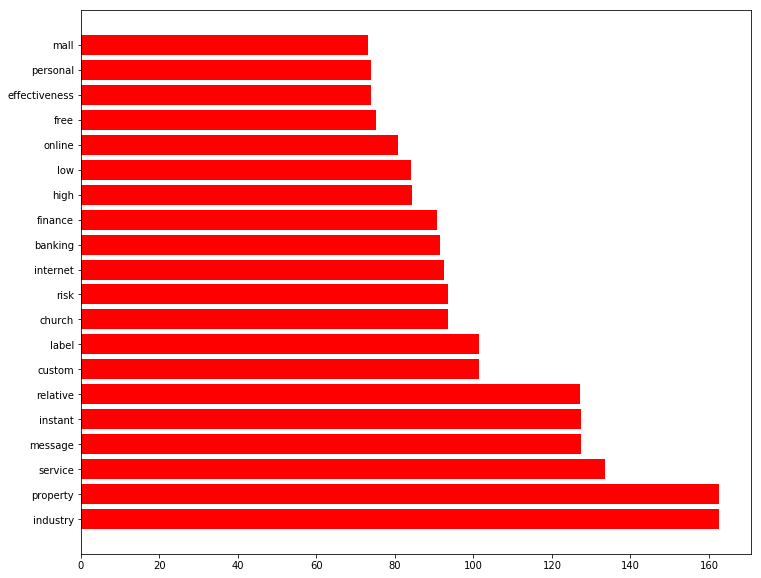

In [33]:
df_agg_female_interest = df_female_interest_vs_time.drop(["day_of_week","hour"], axis=1).sum().to_frame()
df_agg_female_interest.columns = ['count']
df_agg_female_interest = df_agg_female_interest.sort_values(by=['count'],ascending=False)
df_agg_female_interest_Top_20 = df_agg_female_interest.head(20)

plt.figure(figsize=(12,10))
plt.barh(df_agg_female_interest_Top_20.index,df_agg_female_interest_Top_20['count'], color='red')
plt.show()

###### Female interest histogram

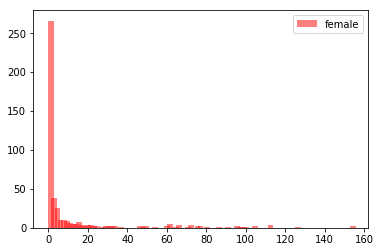

In [34]:
plt.hist(df_agg_male_interest['count'], bins=100, width=3, color="red", alpha=0.5, label='female')
plt.legend(loc='upper right')
plt.show()

###### Female interest distribution

In [35]:
wFemale_Interest_Average = df_agg_female_interest['count'].mean()
wFemale_Interest_Standard_Deviation = df_agg_female_interest['count'].std()
wFemale_Interest_Upper = wFemale_Interest_Average + 3*wFemale_Interest_Standard_Deviation
wFemale_Interest_Lower = wFemale_Interest_Average - 3*wFemale_Interest_Standard_Deviation

print("Interest Vector Sum Average : {0}".format(wFemale_Interest_Average))
print("Interest Vector Sum Standar Deviation: {0}".format(wFemale_Interest_Standard_Deviation))
print("Interest Vector Sum Upper Limit : {0}".format(wFemale_Interest_Upper))
print("Interest Vector Sum Lower Limit: {0}".format(wFemale_Interest_Lower))

Interest Vector Sum Average : 11.004341469907787
Interest Vector Sum Standar Deviation: 24.571482956932158
Interest Vector Sum Upper Limit : 84.71879034070426
Interest Vector Sum Lower Limit: -62.71010740088869


###### Female interest within 3 time Standar Diviation

In [36]:
df_agg_female_interest_keep = df_agg_female_interest[(df_agg_female_interest['count'] > wFemale_Interest_Lower) & (df_agg_female_interest['count'] < wFemale_Interest_Upper)]
df_agg_female_interest_keep.sort_values('count')

,count
zuma,0.00
taiwan,0.00
end,0.00
general,0.00
effort,0.00
xianxia,0.00
word,0.00
aircraft,0.00
western,0.00
airport,0.00


###### Female interest outside 3 time Standar Diviation

In [37]:
df_agg_female_interest_drop = df_agg_female_interest[(df_agg_female_interest['count'] < wFemale_Interest_Lower) | (df_agg_female_interest['count'] > wFemale_Interest_Upper)]
df_agg_female_interest_drop.sort_values('count')

,count
finance,90.77
banking,91.42
internet,92.46
risk,93.46
church,93.47
custom,101.36
label,101.36
relative,127.04
message,127.43
instant,127.43


###### Femaie Interest with 0 counts

In [38]:
df_agg_female_interest_drop = df_agg_female_interest[(df_agg_female_interest['count'] < 0.01)]
df_agg_female_interest_drop.sort_values('count')

,count
aircraft,0.00
xianxia,0.00
effort,0.00
general,0.00
end,0.00
taiwan,0.00
sailing,0.00
rowing,0.00
romance,0.00
regional,0.00


#### Converting Interest to category

In [39]:
# top Interest [ "property", "industry"]
df_categories_of_interest = df_label_categories[(df_label_categories["property"] == 1)|(df_label_categories["industry"] == 1)]
df_categories_of_interest = df_categories_of_interest.sort_values(by=[ "property", "industry"],ascending=False)
df_categories_of_interest

,label_id,category,category-mod,3d,80,90,abroad,academic,accommodation,accounting,...,weibo,weight,west,western,wifi,word,world,xianxia,zombie,zuma
463,549,Property Industry 1.0,property industry,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
579,704,Property Industry 2.0,property industry,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
721,854,Property Industry new,property industry new,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
425,487,Real Estate Property,real estate property,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
504,591,Device Properties,device property,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
636,766,Property Trust,property trust,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
637,767,Intellectual Property Trust,intellectual property trust,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
